In [708]:
import talib # technical analysis
import pandas as pd
import numpy as np

In [709]:
import random
random.seed(42)

In [710]:
dataset = pd.read_csv('ZM.csv')  # data for 1 year 18 may 2019 to 18 may 2020 
dataset = df.dropna()

In [711]:
df.columns
dataset = dataset[['Open', 'High', 'Low', 'Close']]

In [712]:
dataset.head()

,Open,High,Low,Close
0,90.099998,91.459999,83.269997,84.669998
1,86.629997,89.699997,84.500000,85.440002
2,84.629997,85.699997,82.000000,82.430000
3,81.250000,81.500000,77.260002,78.760002
4,80.480003,81.250000,74.199997,76.250000


In [713]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [714]:
dataset['Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

In [715]:
dataset=dataset.dropna()

In [716]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 30 to 251
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         222 non-null    float64
 1   High         222 non-null    float64
 2   Low          222 non-null    float64
 3   Close        222 non-null    float64
 4   H-L          222 non-null    float64
 5   O-C          222 non-null    float64
 6   3day MA      222 non-null    float64
 7   10day MA     222 non-null    float64
 8   30day MA     222 non-null    float64
 9   Std_dev      222 non-null    float64
 10  RSI          222 non-null    float64
 11  Williams %R  222 non-null    float64
 12  Price_Rise   222 non-null    int32  
dtypes: float64(12), int32(1)
memory usage: 23.4 KB


In [717]:
X = dataset.iloc[:,4:-1]
y= dataset.iloc[:,-1]

In [718]:
X.head()

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R
30,2.849998,-1.140000,88.640000,93.149001,88.596000,2.045086,38.533169,-88.967398
31,6.089996,5.000000,86.926666,91.698000,88.611334,2.283965,49.411988,-20.368409
32,3.970001,1.739998,87.479998,90.504000,88.778333,2.705692,51.981926,-4.875458
33,2.900002,-0.680000,89.153330,89.462000,89.093333,2.874444,49.754811,-20.949416
34,2.169999,0.660003,91.029999,88.491000,89.493333,2.681036,50.119732,-19.195051


In [719]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size =0.2) 

In [720]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [721]:
xtrain = sc.fit_transform(xtrain)   # standardize makes  mean of all input features =0 and variance =1 If this is not done the neural network might get confused and give a higher weight to those features which have a higher average value than others. 
xtest = sc.fit_transform(xtest)

In [722]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [723]:
classifier = Sequential() 

In [724]:
x.shape[1]

8

In [725]:
classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu',input_dim=x.shape[1])) # hidden layer has all 8 columns

In [726]:
classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu')) # 2nd hidden layer

In [727]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) # output layer  we would want the prediction to be a probability of market moving upwards

In [728]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [729]:
classifier.fit(xtrain, ytrain, batch_size = 10, epochs = 100)

Epoch 1/100
177/177 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.5085
Epoch 2/100
177/177 [==============================] - 0s 222us/step - loss: 0.2489 - accuracy: 0.5367
Epoch 3/100
177/177 [==============================] - 0s 216us/step - loss: 0.2475 - accuracy: 0.5876
Epoch 4/100
177/177 [==============================] - 0s 224us/step - loss: 0.2448 - accuracy: 0.5763
Epoch 5/100
177/177 [==============================] - 0s 211us/step - loss: 0.2406 - accuracy: 0.5932
Epoch 6/100
177/177 [==============================] - 0s 222us/step - loss: 0.2391 - accuracy: 0.5989
Epoch 7/100
177/177 [==============================] - 0s 219us/step - loss: 0.2365 - accuracy: 0.6045
Epoch 8/100
177/177 [==============================] - 0s 229us/step - loss: 0.2343 - accuracy: 0.6102
Epoch 9/100
177/177 [==============================] - 0s 217us/step - loss: 0.2351 - accuracy: 0.6045
Epoch 10/100
177/177 [==============================] - 0s 232us/step - los

177/177 [==============================] - 0s 219us/step - loss: 0.1296 - accuracy: 0.8305
Epoch 80/100
177/177 [==============================] - 0s 222us/step - loss: 0.1282 - accuracy: 0.8305
Epoch 81/100
177/177 [==============================] - 0s 224us/step - loss: 0.1270 - accuracy: 0.8362
Epoch 82/100
177/177 [==============================] - 0s 220us/step - loss: 0.1232 - accuracy: 0.8475
Epoch 83/100
177/177 [==============================] - 0s 212us/step - loss: 0.1259 - accuracy: 0.8249
Epoch 84/100
177/177 [==============================] - 0s 219us/step - loss: 0.1235 - accuracy: 0.8362
Epoch 85/100
177/177 [==============================] - 0s 237us/step - loss: 0.1246 - accuracy: 0.8249
Epoch 86/100
177/177 [==============================] - 0s 230us/step - loss: 0.1344 - accuracy: 0.7966
Epoch 87/100
177/177 [==============================] - 0s 220us/step - loss: 0.1304 - accuracy: 0.8418
Epoch 88/100
177/177 [==============================] - 0s 220us/step - loss:

In [730]:
ypred = classifier.predict(xtest)
ypred = (ypred > 0.5) #storing predictions greater than 0.5

In [731]:
len(dataset)
#len(ypred)

222

In [732]:
dataset['ypred'] = np.NaN
dataset.iloc[(len(dataset)-len(ypred)):,-1:]= ypred
#dataset.iloc[(len(dataset)-len(ypred)):,-1:]
trade_dataset = dataset.dropna()

In [733]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)


G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [734]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['ypred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [735]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])


G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


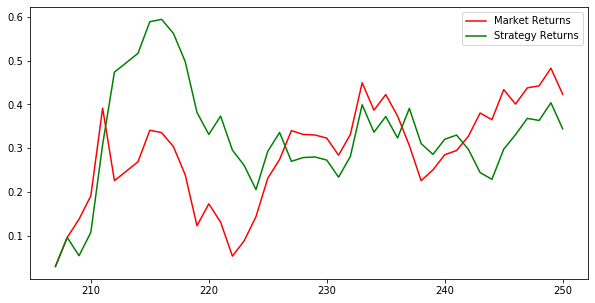

In [736]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()

In [ ]:
# we got 87% accuracy